In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_local = "../../FBD_local_data/"
data_repo = "../Data/"

### Notebook to work on pairs trading strategy

This notebook starts with importing the clustering table.  
Is a table with index:assets (tickers), one column:cluster (int)

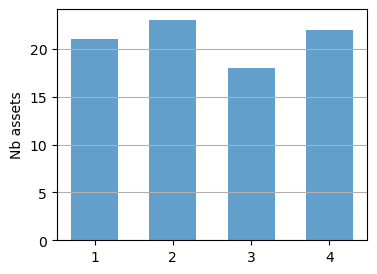

In [95]:
# Generate random clustering table (later, work with tables of part3)

def generate_random_clusters(n_clusters=3):

    # Retrive tickers
    df = pd.read_csv(data_local + "stock_prices.csv")
    TICKERS = df.columns[1:]

    df_clusters = pd.DataFrame(index = TICKERS, columns=["cluster"])
    
    df_clusters["cluster"] = np.random.randint(1, n_clusters+1, size=len(TICKERS))
    
    return df_clusters
    



n_clusters = 4
df_clusters = generate_random_clusters(n_clusters)

plt.figure(figsize=(4, 3))
plt.bar(df_clusters["cluster"].value_counts().index, df_clusters["cluster"].value_counts().values, width=0.6, alpha=0.7)
plt.xticks(range(n_clusters+1)[1:])
plt.ylabel("Cluster")
plt.ylabel("Nb assets")
plt.grid(axis="y")
plt.show()


In [96]:
display(df_clusters)

,cluster
ABT,3
AEP,1
ALL,3
APA,4
AVP,4
...,...
WMB,2
WMT,4
WY,4
XOM,2


In [ ]:
# Import prices and compute returns

df_prices = pd.read_csv(data_local + "stock_prices.csv")
df_prices.set_index("timestamp", inplace=True, drop=True)
df_prices = df_prices.interpolate(method="linear", limit_direction="both")

df_returns = df_prices.pct_change()

DATA = {}
DATA["PRICES"] = df_prices
DATA["RETURNS"] = df_returns
display(DATA["RETURNS"])

,ABT,AEP,ALL,APA,AVP,AXP,BA,BAC,BAX,BHI,...,UTX,V,VZ,WAG,WFC,WMB,WMT,WY,XOM,XRX
timestamp,,,,,,,,,,,,,,,,,,,,,
2008-09-02 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-02 13:31:00,0.001086,0.000000,0.001845,0.000000,0.000000,0.000000,0.000000,0.000256,-0.000613,0.000000,...,0.002204,0.002427,0.000645,0.000311,0.001472,0.000000,0.002191,-0.001661,-0.000118,0.000000
2008-09-02 13:32:00,0.000139,-0.001650,-0.000629,0.000000,0.002826,0.004663,-0.000466,-0.000373,0.003050,0.000171,...,0.001687,-0.000645,-0.000271,0.002273,0.000370,-0.003892,0.004793,-0.001168,-0.002759,0.000000
2008-09-02 13:33:00,-0.000096,-0.000725,-0.006185,0.000000,-0.001030,-0.003144,0.003865,-0.001452,0.002064,-0.001605,...,0.001327,-0.000165,0.000396,-0.000499,-0.002253,-0.009882,0.003259,0.000344,-0.001861,0.003866
2008-09-02 13:34:00,0.000238,0.002116,-0.003240,-0.004954,0.000277,-0.006141,-0.003122,-0.004618,0.000466,0.002890,...,0.001533,0.001093,0.001267,0.000467,-0.000040,-0.004534,0.002060,0.002944,0.001328,0.000495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-30 21:34:00,-0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000021,0.000000,...,-0.000004,0.000000,0.000000,0.000000,0.000025,-0.000050,0.000000,0.000000,0.000000,0.000000
2008-12-30 21:37:00,-0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000021,0.000000,...,-0.000004,0.000000,0.000000,0.000000,0.000025,-0.000050,0.000000,0.000000,0.000000,0.000000
2008-12-30 21:38:00,-0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000021,0.000000,...,-0.000004,0.000000,0.000000,0.000000,0.000000,-0.000050,0.000000,0.000000,0.000000,0.000000
